In [112]:
import numpy as np
import matplotlib.pyplot as plt

In [108]:

N = 3
n_classe1, n_classe2 = [4, 2]
lambda1, lambda2 = [5/60*n_classe1, 10/60*n_classe2]
mi1, mi2 = [1/5, 1/2]

mat = np.array([[[0], [0], [0], [0]], [[0], [0], [0], [0]], [[0], [0], [0], [0]], [[0], [0], [0], [0]]])
partidas, chegadas = [0, [0, 0]]
servidor, probabBloqueio = [0, [0, 0]]

if np.random.uniform(0, 1) < 0.6:
  servidor = 1
  chegadas[0] = 1
  classesPartidas = [1]
  proximaChegada = np.random.exponential(1/lambda1, 1)
  proximasPartidas = proximaChegada + np.random.exponential(1/mi1, 1)
  n_classe1 -= 1
else:
  servidor = 2
  chegadas[1] = 1
  classesPartidas = [2]
  proximaChegada = np.random.exponential(1/lambda2, 1)
  proximasPartidas = proximaChegada + np.random.exponential(1/mi2, 1)
  n_classe2 -= 1

mat[3-n_classe1][2-n_classe2] += 1
t = np.minimum(proximaChegada, proximasPartidas)
tempoChegadas, tempoPartidas, tempoSistema = [[0], [], [[], []]]
while (t < 15000):
  if proximaChegada < np.min(proximasPartidas):
    limiarClasse = n_classe1/(n_classe1 + n_classe2)
    classe_chegada = 1 if (x:= np.random.uniform(0, 1)) < limiarClasse else 2
    chegadas[classe_chegada-1] += 1

    if (servidor + classe_chegada) > N:
      probabBloqueio[classe_chegada-1] += 1
    else:
      if len(np.where(proximasPartidas == np.infty)[0]) == 1: proximasPartidas = []
      if x < limiarClasse:
        lambda1 = 5/60*n_classe1
        n_classe1 -= 1
        classesPartidas = np.append(classesPartidas, classe_chegada)
        proximasPartidas = np.append(proximasPartidas, t + np.random.exponential(1/mi1, 1))
      else:
        lambda2 = 10/60*n_classe2
        n_classe2 -= 1
        classesPartidas = np.append(classesPartidas, classe_chegada)
        proximasPartidas = np.append(proximasPartidas, t + np.random.exponential(1/mi2, 1))

      servidor += classe_chegada
      tempoChegadas = np.append(tempoChegadas, t)

    if x < limiarClasse: proximaChegada = t + np.random.exponential(1/lambda1, 1)
    else: proximaChegada = t + np.random.exponential(1/lambda2, 1)

  else:
    classe_partida = classesPartidas[np.where(proximasPartidas == t)[0][0]]
    servidor -= classe_partida

    globals()[f'n_classe{classe_partida}'] += 1
    classesPartidas = np.delete(classesPartidas, np.where(proximasPartidas == t)[0][0])
    proximasPartidas = np.delete(proximasPartidas, np.where(proximasPartidas == t)[0][0])
    if servidor == 0: proximasPartidas = np.array([np.infty])

    partidas += 1
    tempoPartidas = np.append(tempoPartidas, t)
    tempoSistema[classe_partida-1] = np.append(tempoSistema[classe_partida-1], (tempoPartidas[partidas-1] - tempoChegadas[partidas-1]))

  t = np.minimum(proximaChegada, np.min(proximasPartidas))
  mat[4-n_classe1][2-n_classe2] += 1

mat = mat/np.sum(mat)
for i in range(4):
  for j in range(4):
    if (x:= mat[i][j][0]) != 0: print(f'P{i}{j} = {x:.4}')

print(f'\nProbabilidade de bloqueio da classe 1 Pb1 = {probabBloqueio[0]/chegadas[0]:.4}')
print(f'Probabilidade de bloqueio da classe 2 Pb2 = {probabBloqueio[1]/chegadas[1]:.4}')

print(f'\nTempo médio de sistema para a classe 1 = {np.mean(tempoSistema[0]):.4} segundos.')
print(f'Tempo médio de sistema para a classe 2 = {np.mean(tempoSistema[1]):.4} segundos.')

P00 = 0.1904
P01 = 0.1122
P10 = 0.3112
P11 = 0.1625
P20 = 0.1788
P30 = 0.04486

Probabilidade de bloqueio da classe 1 Pb1 = 0.1214
Probabilidade de bloqueio da classe 2 Pb2 = 0.3056

Tempo médio de sistema para a classe 1 = 4.497 segundos.
Tempo médio de sistema para a classe 2 = 3.038 segundos.


In [153]:

bloqueio = [[], []]

for lambda2 in np.arange(1, 10.5, 0.5):
  N = 3
  n_classe1, n_classe2 = [4, 2]
  lambda1 = 5/60*n_classe1
  mi1, mi2 = [1/5, 1/2]

  mat = np.array([[[0], [0], [0], [0]], [[0], [0], [0], [0]], [[0], [0], [0], [0]], [[0], [0], [0], [0]]])
  partidas, chegadas = [0, [0, 0]]
  servidor, probabBloqueio = [0, [0, 0]]

  if np.random.uniform(0, 1) < 0.6:
    servidor = 1
    chegadas[0] = 1
    classesPartidas = [1]
    proximaChegada = np.random.exponential(1/lambda1, 1)
    proximasPartidas = proximaChegada + np.random.exponential(1/mi1, 1)
    n_classe1 -= 1
  else:
    servidor = 2
    chegadas[1] = 1
    classesPartidas = [2]
    proximaChegada = np.random.exponential(1/lambda2, 1)
    proximasPartidas = proximaChegada + np.random.exponential(1/mi2, 1)
    n_classe2 -= 1

  mat[3-n_classe1][2-n_classe2] += 1
  t = np.minimum(proximaChegada, proximasPartidas)
  tempoChegadas, tempoPartidas, tempoSistema = [[0], [], [[], []]]
  while (t < 10000):
    if proximaChegada < np.min(proximasPartidas):
      limiarClasse = n_classe1/(n_classe1 + n_classe2)
      classe_chegada = 1 if (x:= np.random.uniform(0, 1)) < limiarClasse else 2
      chegadas[classe_chegada-1] += 1

      if (servidor + classe_chegada) > N:
        probabBloqueio[classe_chegada-1] += 1
      else:
        if len(np.where(proximasPartidas == np.infty)[0]) == 1: proximasPartidas = []
        if x < limiarClasse:
          lambda1 = 5/60*n_classe1
          n_classe1 -= 1
          classesPartidas = np.append(classesPartidas, classe_chegada)
          proximasPartidas = np.append(proximasPartidas, t + np.random.exponential(1/mi1, 1))
        else:
          lambda2 = 10/60*n_classe2
          n_classe2 -= 1
          classesPartidas = np.append(classesPartidas, classe_chegada)
          proximasPartidas = np.append(proximasPartidas, t + np.random.exponential(1/mi2, 1))

        servidor += classe_chegada
        tempoChegadas = np.append(tempoChegadas, t)

      if x < limiarClasse: proximaChegada = t + np.random.exponential(1/lambda1, 1)
      else: proximaChegada = t + np.random.exponential(1/lambda2, 1)

    else:
      classe_partida = classesPartidas[np.where(proximasPartidas == t)[0][0]]
      servidor -= classe_partida

      globals()[f'n_classe{classe_partida}'] += 1
      classesPartidas = np.delete(classesPartidas, np.where(proximasPartidas == t)[0][0])
      proximasPartidas = np.delete(proximasPartidas, np.where(proximasPartidas == t)[0][0])
      if servidor == 0: proximasPartidas = np.array([np.infty])

      partidas += 1
      tempoPartidas = np.append(tempoPartidas, t)
      tempoSistema[classe_partida-1] = np.append(tempoSistema[classe_partida-1], (tempoPartidas[partidas-1] - tempoChegadas[partidas-1]))

    t = np.minimum(proximaChegada, np.min(proximasPartidas))
    mat[4-n_classe1][2-n_classe2] += 1

  for i in range(2): bloqueio[i] = np.append(bloqueio[i], probabBloqueio[i]/chegadas[i])


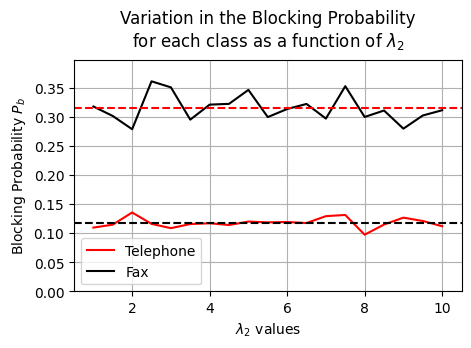

<Figure size 640x480 with 0 Axes>

In [154]:
plt.figure(figsize=(5, 3))
plt.plot(np.arange(1, 10.5, 0.5), bloqueio[0], label='Telephone', color='r')
plt.axhline(y=np.mean(bloqueio[0]), color='k', linestyle='--')
plt.plot(np.arange(1, 10.5, 0.5), bloqueio[1], label='Fax', color='k')
plt.axhline(y=np.mean(bloqueio[i]), color='r', linestyle='--')
plt.title('Variation in the Blocking Probability\nfor each class as a function of $\lambda_{2}$', pad=10)
plt.xlabel('$\lambda_{2}$ values'), plt.xlim([0.5, 10.5])
plt.ylabel('Blocking Probability $P_{b}$'), plt.ylim([0, max(bloqueio[1])*1.1])
plt.grid(True), plt.legend(), plt.show()
plt.savefig('bloq.png', dpi=300)

In [144]:

bloqueio = [[], []]

for lambda1 in np.arange(1, 10.5, 0.5):
  N = 3
  n_classe1, n_classe2 = [4, 2]
  lambda2 = 10/60*n_classe1
  mi1, mi2 = [1/5, 1/2]

  mat = np.array([[[0], [0], [0], [0]], [[0], [0], [0], [0]], [[0], [0], [0], [0]], [[0], [0], [0], [0]]])
  partidas, chegadas = [0, [0, 0]]
  servidor, probabBloqueio = [0, [0, 0]]

  if np.random.uniform(0, 1) < 0.6:
    servidor = 1
    chegadas[0] = 1
    classesPartidas = [1]
    proximaChegada = np.random.exponential(1/lambda1, 1)
    proximasPartidas = proximaChegada + np.random.exponential(1/mi1, 1)
    n_classe1 -= 1
  else:
    servidor = 2
    chegadas[1] = 1
    classesPartidas = [2]
    proximaChegada = np.random.exponential(1/lambda2, 1)
    proximasPartidas = proximaChegada + np.random.exponential(1/mi2, 1)
    n_classe2 -= 1

  mat[3-n_classe1][2-n_classe2] += 1
  t = np.minimum(proximaChegada, proximasPartidas)
  tempoChegadas, tempoPartidas, tempoSistema = [[0], [], [[], []]]
  while (t < 10000):
    if proximaChegada < np.min(proximasPartidas):
      limiarClasse = n_classe1/(n_classe1 + n_classe2)
      classe_chegada = 1 if (x:= np.random.uniform(0, 1)) < limiarClasse else 2
      chegadas[classe_chegada-1] += 1

      if (servidor + classe_chegada) > N:
        probabBloqueio[classe_chegada-1] += 1
      else:
        if len(np.where(proximasPartidas == np.infty)[0]) == 1: proximasPartidas = []
        if x < limiarClasse:
          lambda1 = 5/60*n_classe1
          n_classe1 -= 1
          classesPartidas = np.append(classesPartidas, classe_chegada)
          proximasPartidas = np.append(proximasPartidas, t + np.random.exponential(1/mi1, 1))
        else:
          lambda2 = 10/60*n_classe2
          n_classe2 -= 1
          classesPartidas = np.append(classesPartidas, classe_chegada)
          proximasPartidas = np.append(proximasPartidas, t + np.random.exponential(1/mi2, 1))

        servidor += classe_chegada
        tempoChegadas = np.append(tempoChegadas, t)

      if x < limiarClasse: proximaChegada = t + np.random.exponential(1/lambda1, 1)
      else: proximaChegada = t + np.random.exponential(1/lambda2, 1)

    else:
      classe_partida = classesPartidas[np.where(proximasPartidas == t)[0][0]]
      servidor -= classe_partida

      globals()[f'n_classe{classe_partida}'] += 1
      classesPartidas = np.delete(classesPartidas, np.where(proximasPartidas == t)[0][0])
      proximasPartidas = np.delete(proximasPartidas, np.where(proximasPartidas == t)[0][0])
      if servidor == 0: proximasPartidas = np.array([np.infty])

      partidas += 1
      tempoPartidas = np.append(tempoPartidas, t)
      tempoSistema[classe_partida-1] = np.append(tempoSistema[classe_partida-1], (tempoPartidas[partidas-1] - tempoChegadas[partidas-1]))

    t = np.minimum(proximaChegada, np.min(proximasPartidas))
    mat[4-n_classe1][2-n_classe2] += 1

  for i in range(2): bloqueio[i] = np.append(bloqueio[i], probabBloqueio[i]/chegadas[i])


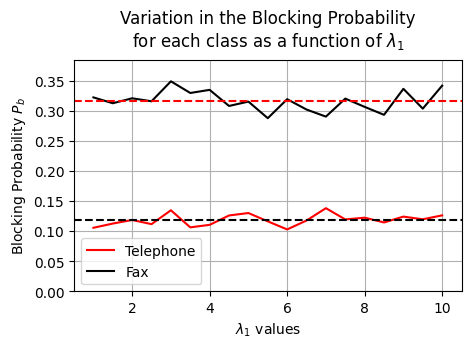

<Figure size 640x480 with 0 Axes>

In [152]:
plt.figure(figsize=(5, 3))
plt.plot(np.arange(1, 10.5, 0.5), bloqueio[0], label='Telephone', color='r')
plt.axhline(y=np.mean(bloqueio[0]), color='k', linestyle='--')
plt.plot(np.arange(1, 10.5, 0.5), bloqueio[1], label='Fax', color='k')
plt.axhline(y=np.mean(bloqueio[i]), color='r', linestyle='--')
plt.title('Variation in the Blocking Probability\nfor each class as a function of $\lambda_{1}$', pad=10)
plt.xlabel('$\lambda_{1}$ values'), plt.xlim([0.5, 10.5])
plt.ylabel('Blocking Probability $P_{b}$'), plt.ylim([0, max(bloqueio[1])*1.1])
plt.grid(True), plt.legend(), plt.show()
plt.savefig('bloq.png', dpi=300)